In [1]:
from qgis import core

In [2]:
layer = core.QgsVectorLayer("/home/luca/Code/mappy.git/input_data/contacts|layername=contacts")

In [3]:
import geopandas
t1 = geopandas.read_file("/home/luca/Code/mappy.git/input_data/contacts" ,layer="contacts")

In [14]:
layer = core.QgsVectorLayer("/home/luca/aa.gpkg|layername=geomap")


In [15]:
for i in layer.getFeatures():
    print (i)

['id']


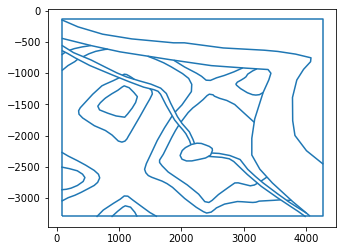

In [4]:
import shapely.wkt
import pandas as pd
from pyproj import CRS
from geopandas import GeoDataFrame

def read_layer(layer):
    names = [field.name() for field in layer.fields()]
    print(names)
    data = []
    for feature in layer.getFeatures():
        if feature.hasGeometry() is False:
            continue
        wkt = feature.geometry().asWkt()

        s = shapely.wkt.loads(wkt)
        
        my_dict = {}
        for i, a in enumerate(feature.attributes()):
            my_dict[names[i]] = a
        
        my_dict['geometry'] = s
        data.append(my_dict)
    df = pd.DataFrame(data)
    crs = CRS(int(layer.sourceCrs().geographicCrsAuthId().split(':')[1]))
    geo_df = GeoDataFrame(df, crs=crs)
    #df_by_id = dict(tuple(geo_df.groupby(trajectory_id_field)))
   
    return geo_df

tab = read_layer(layer)
tab.plot()

In [5]:
import sys
sys.path.append("../")
import mappy

In [6]:

lines = mappy.extend_lines(tab, 2)

In [7]:
lines

,id,geometry
0,NULL,LINESTRING (70.0454340926772 -138.388337994109...
1,NULL,LINESTRING (4067.65440300882 -3295.94297528673...
2,NULL,LINESTRING (2063.604535753394 -2194.9486155024...
3,NULL,LINESTRING (76.50697897266873 -549.87705033685...
4,NULL,LINESTRING (2154.417945632302 -2149.9621618826...
5,NULL,LINESTRING (635.3946540047255 -3309.0224610953...
6,NULL,LINESTRING (876.2524146421669 -3308.9479711390...
7,NULL,LINESTRING (70.70044518763464 -2265.3137362804...
8,NULL,LINESTRING (67.16833171478018 -2505.2022343256...
9,NULL,LINESTRING (1874.553663798308 -788.93642299488...


In [7]:
mappy.geom_ops.explode_all(tab.geometry)

In [68]:
tab.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

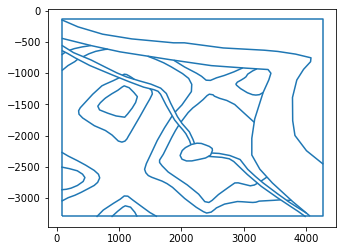

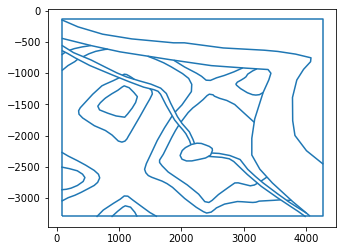

In [66]:
t1.plot()
tab.plot()

In [38]:
from shapely.geometry import LineString
import shapely

In [39]:
for feature in layer.getFeatures():

SyntaxError: unexpected EOF while parsing (<ipython-input-39-fc5b86fdabf1>, line 2)

ParseException: Expected word but encountered end of stream


WKTReadingError: Could not create geometry because of errors while reading input.